In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import h5py
import cv2
from PIL import Image
from scipy.io import matlab
import os
import glob

In [2]:
part_A_train = os.path.join(os.getcwd(),'ShanghaiTech\\part_A\\train_data\\images')
part_A_test = os.path.join(os.getcwd(),'ShanghaiTech\\part_A\\test_data\\images')
part_B_train = os.path.join(os.getcwd(),'ShanghaiTech\\part_B\\train_data\\images')
part_B_test = os.path.join(os.getcwd(),'ShanghaiTech\\part_B\\test_data\\images')

In [3]:
part_A_train_images = glob.glob(os.path.join(part_A_train,'*.jpg'))
len(part_A_train_images)

300

In [4]:
part_A_train_images = glob.glob(os.path.join(part_A_train,'*.jpg'))
part_A_test_images = glob.glob(os.path.join(part_A_test,'*.jpg'))
part_B_train_images = glob.glob(os.path.join(part_B_train,'*.jpg'))
part_B_test_images = glob.glob(os.path.join(part_B_test,'*.jpg'))
print(f'Shanghai Part A train -- total size {len(part_A_train_images)}')
print(f'Shanghai Part A test -- total size {len(part_A_test_images)}')
print(f'Shanghai Part B train -- total size {len(part_B_train_images)}')
print(f'Shanghai Part B test -- total size {len(part_B_test_images)}')
print(f'Total people counting images = {len(part_A_train_images)+len(part_A_test_images)+len(part_B_train_images)+len(part_B_test_images)}')

Shanghai Part A train -- total size 300
Shanghai Part A test -- total size 182
Shanghai Part B train -- total size 400
Shanghai Part B test -- total size 316
Total people counting images = 1198


In [5]:
matlab_file = matlab.loadmat(part_A_train_images[0].replace('IMG','GT_IMG').replace('jpg','mat').replace('images','ground-truth'))

In [6]:
matlab_file['image_info'][0][0][0][0][0].shape

(1546, 2)

In [31]:
matlab_file["image_info"][0, 0][0, 0][0]

array([[ 29.6225116 , 472.92022152],
       [ 54.35533603, 454.96602305],
       [ 51.79045053, 460.46220626],
       ...,
       [597.89732076, 688.27900015],
       [965.77518336, 638.44693908],
       [166.9965574 , 628.1873971 ]])

In [7]:
annotated_points = matlab_file['image_info'][0][0][0][0][0]
annotated_points

array([[ 29.6225116 , 472.92022152],
       [ 54.35533603, 454.96602305],
       [ 51.79045053, 460.46220626],
       ...,
       [597.89732076, 688.27900015],
       [965.77518336, 638.44693908],
       [166.9965574 , 628.1873971 ]])

In [8]:
original_image = plt.imread(part_A_train_images[0])
original_image

array([[[255, 254, 255],
        [251, 250, 255],
        [252, 251, 255],
        ...,
        [235, 236, 240],
        [236, 237, 241],
        [237, 238, 240]],

       [[252, 251, 255],
        [253, 252, 255],
        [250, 249, 254],
        ...,
        [242, 243, 247],
        [230, 231, 235],
        [220, 221, 223]],

       [[250, 249, 254],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [223, 224, 228],
        [225, 226, 230],
        [230, 231, 233]],

       ...,

       [[242, 171, 201],
        [240, 169, 199],
        [238, 167, 197],
        ...,
        [206, 180, 165],
        [205, 179, 164],
        [204, 178, 163]],

       [[239, 168, 198],
        [237, 166, 196],
        [237, 164, 194],
        ...,
        [210, 184, 169],
        [209, 183, 168],
        [208, 182, 167]],

       [[238, 165, 195],
        [237, 164, 194],
        [234, 161, 191],
        ...,
        [213, 187, 172],
        [212, 186, 171],
        [211, 185, 170]]

In [9]:
np.min(original_image)

4

In [10]:
np.max(original_image)

255

In [11]:
original_image.shape

(768, 1024, 3)

In [12]:
output_file  = part_A_train_images[0].replace('jpg','h5').replace('images','ground-truth-h5')
ou = h5py.File(output_file,'r')
ground_truth = np.array(ou['density'])
ground_truth_1 = np.asarray(ou['density'])

In [13]:
ground_truth_1.min(),ground_truth_1.max()

(0.0, 0.26347283)

In [26]:
np.sum(ground_truth)

1543.841

In [14]:
ground_truth.shape

(768, 1024)

In [15]:
ground_truth_1.min(),ground_truth_1.max()

(0.0, 0.26347283)

In [16]:
ground_truth_1.shape

(768, 1024)

In [17]:
ground_truth_1[:]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.5245415e-05, 3.9891562e-05, 4.5005221e-05, ..., 8.3316003e-08,
        7.9835857e-08, 7.6443328e-08],
       [3.3830602e-05, 3.8291390e-05, 4.3201180e-05, ..., 7.5667948e-08,
        7.2507262e-08, 6.9426157e-08],
       [3.2372249e-05, 3.6641646e-05, 4.1340896e-05, ..., 6.8670069e-08,
        6.5801693e-08, 6.3005523e-08]], dtype=float32)

#### creating a density map

In [18]:
height,width = original_image.shape[0],original_image.shape[1]
height,width

(768, 1024)

In [19]:
density_map = np.zeros((height,width),dtype=np.float32)
density_map.shape

(768, 1024)

In [20]:
density_map

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

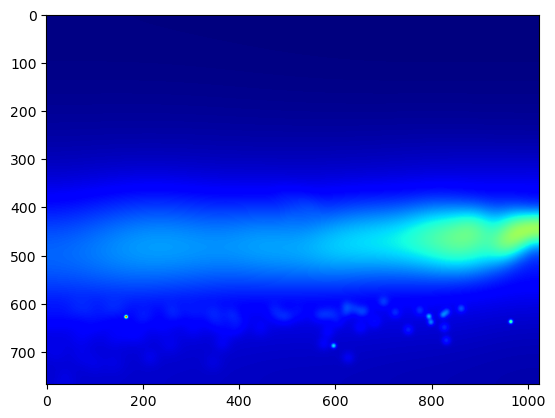

In [28]:
for point in annotated_points:
    x , y = point
    
    x , y = int(x),int(y)
    
    if x < width and y < height:
    
        density_map[y,x]+=1
        
        density_map = cv2.GaussianBlur(density_map,(0,0), sigmaX=2, sigmaY=2)

# Visualize density map (optional)
plt.imshow(density_map,cmap='jet')

In [30]:
np.sum(density_map)

4644.9077

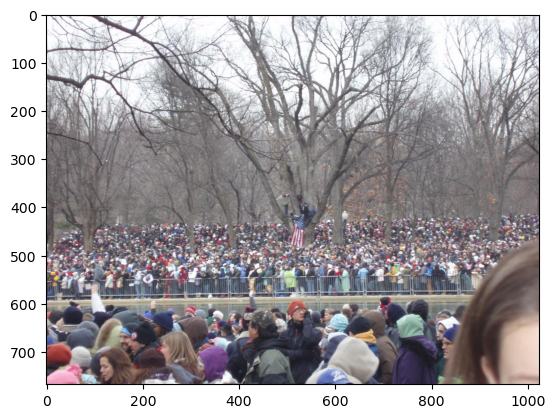

In [22]:
plt.imshow(original_image)